<a href="https://www.kaggle.com/code/shanakk/iris-flower-classification?scriptVersionId=141368063" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


We are going to use a very famous dataset called Iris.

Attributes:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm


Class:

* Iris Setosa
* Iris Versicolour
* Iris Virginica

The dataset contain 150 instances.Each class contain 50 instances.

Task:
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

# ***Import modules***

In [2]:
import pandas as pd
import numpy as np

#visualising modules
import seaborn as sns
import matplotlib.pyplot as plt

#Removing warnings from output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 # ***EDA the dataset***


# **Load the dataset** #

In [3]:
df=pd.read_csv("/kaggle/input/iriscsv/Iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#for printing first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#for display the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#to display the descriptive statistics of a DataFrame's numerical columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#to check the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#to get the count of the each class in a specific column
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# ***Visualising the data***

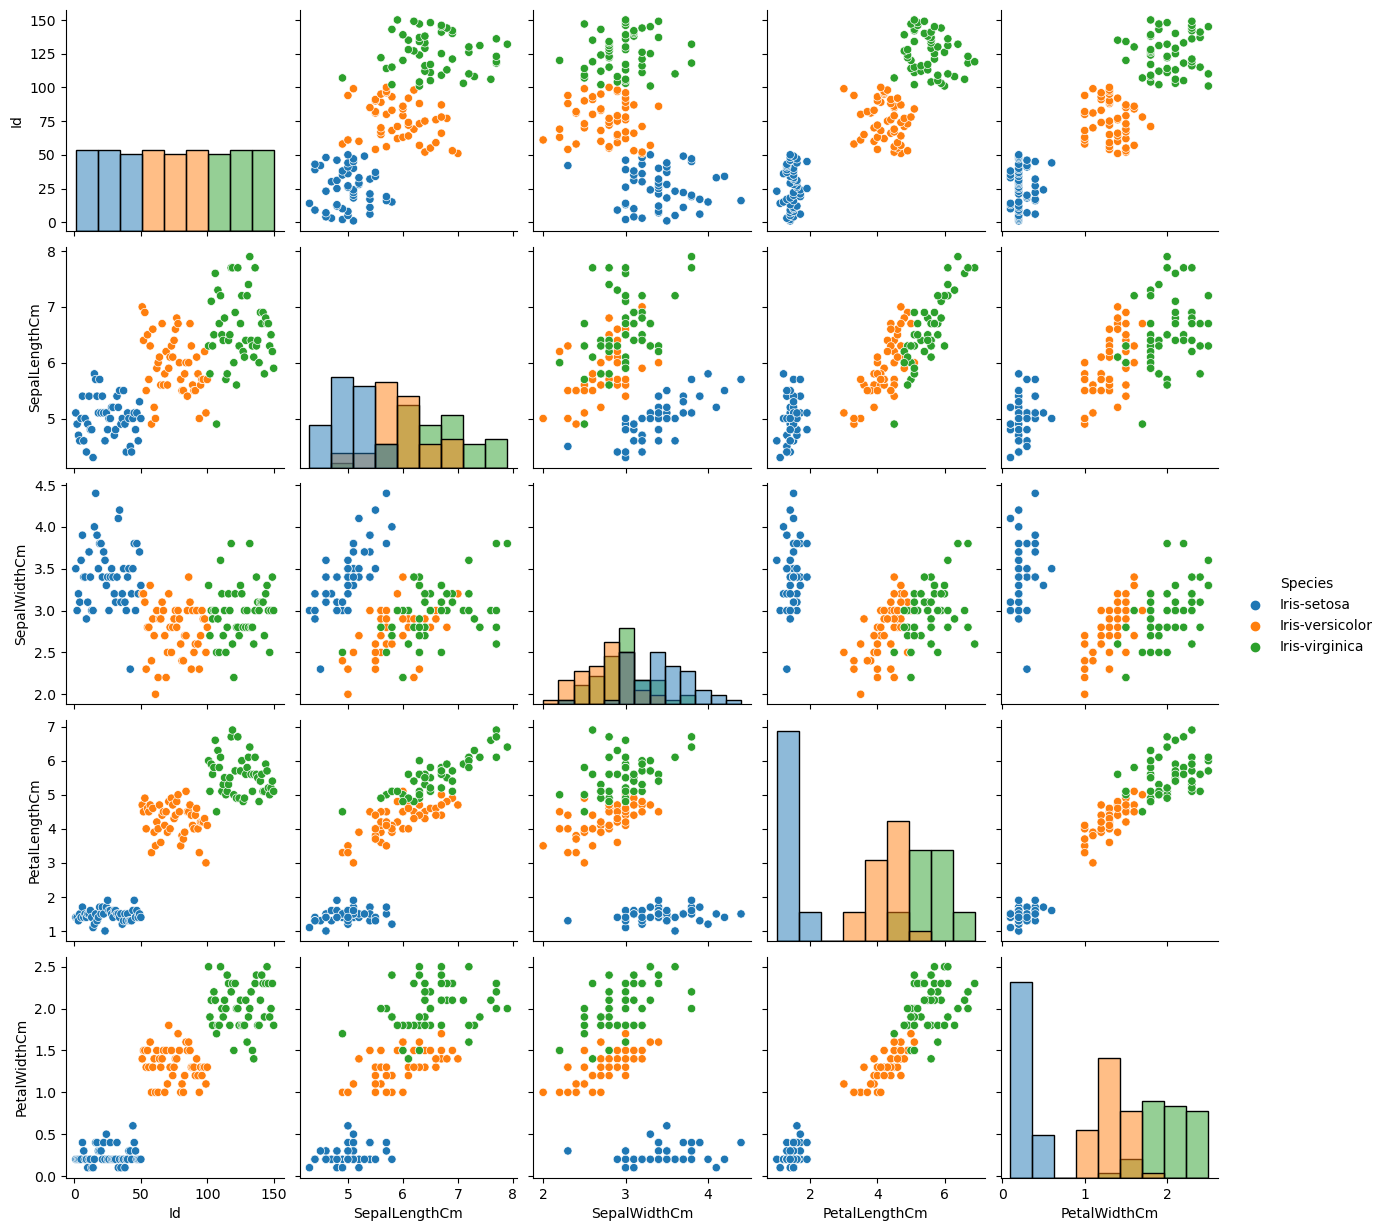

In [10]:
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.show()

Text(0, 0.5, 'PetalWidthCm')

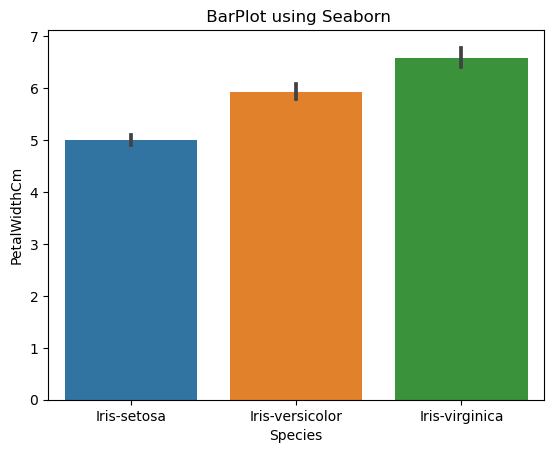

In [11]:

sns.barplot(x=df['Species'],y=df['SepalLengthCm'] )  # Create the histogram
plt.title(" BarPlot using Seaborn")  # Add a title
plt.xlabel("Species")  # Label for x-axis
plt.ylabel("PetalWidthCm")  # Label for y-axis


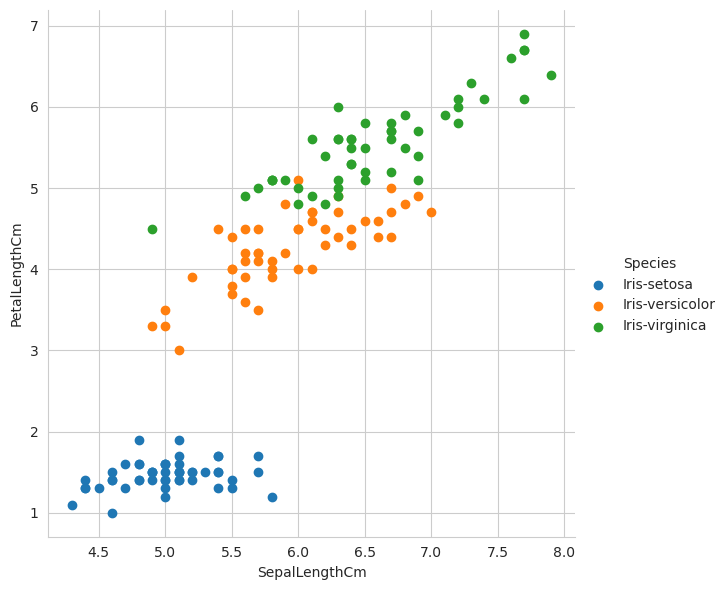

In [12]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

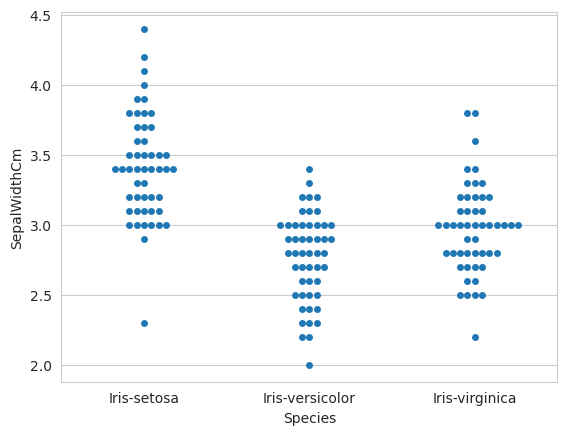

In [13]:
sns.swarmplot(x='Species',y='SepalWidthCm',data=df)

# ***Correlation Matrix***

In [14]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [15]:
#convert objects into numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

In [16]:
#Iris-setosa    =0
#Iris-versicolor=1
#Iris-virginica =2
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


# ***Correlation matrix using heatmap***

<Axes: >

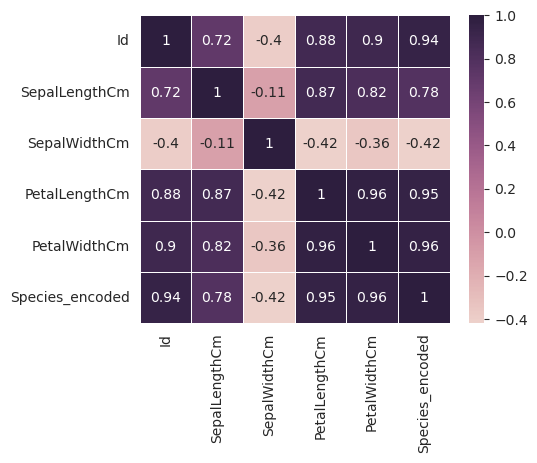

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

# ***Model Training***

In [18]:
X = df.drop(columns=['Species'])
Y = df['Species']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

# ***Logistic Regression***

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train,y_train)
log_reg_accuracy = log_reg.score(x_test, y_test)
print("Accuracy of Logistic Regression: ", log_reg_accuracy*100)
y_pred_log_reg = log_reg.predict(x_test)

Accuracy of Logistic Regression:  95.55555555555556


# ***KNN Model***

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy=knn.score(x_test, y_test)
print("Accuracy of KNN model:",knn_accuracy*100)
y_pred_knn=knn.predict(x_test)

Accuracy of KNN model: 100.0


# ***Decision Tree Model***

In [22]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_accuracy = decision_tree.score(x_test,y_test)
print("Accuracy of Decision Tree: ", decision_tree_accuracy*100)
y_pred_desc_tree=decision_tree.predict(x_test)

Accuracy of Decision Tree:  97.77777777777777


# ***Confusion Matrix***

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
conf_matr_logreg=confusion_matrix(y_test,y_pred_log_reg)
conf_matr_knn=confusion_matrix(y_test,y_pred_knn)
conf_matr_desc_tree=confusion_matrix(y_test,y_pred_desc_tree)

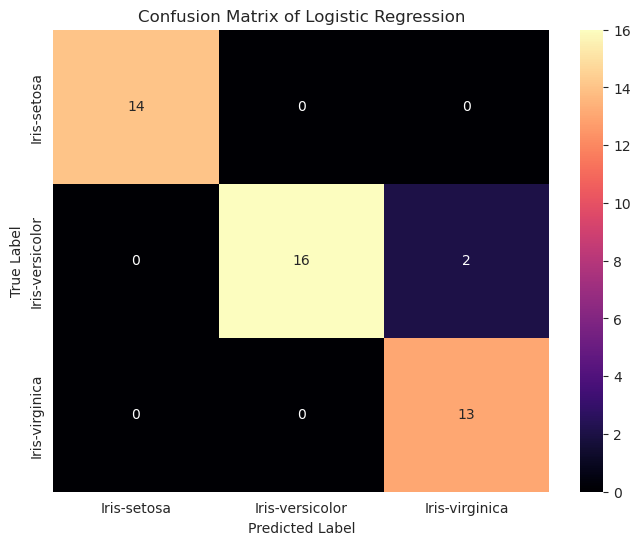

In [25]:
#Confusion Matrix of Logistic Regression
plt.figure(figsize=(8,6))
sns.heatmap(conf_matr_logreg,annot=True,fmt='d',cmap='magma', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

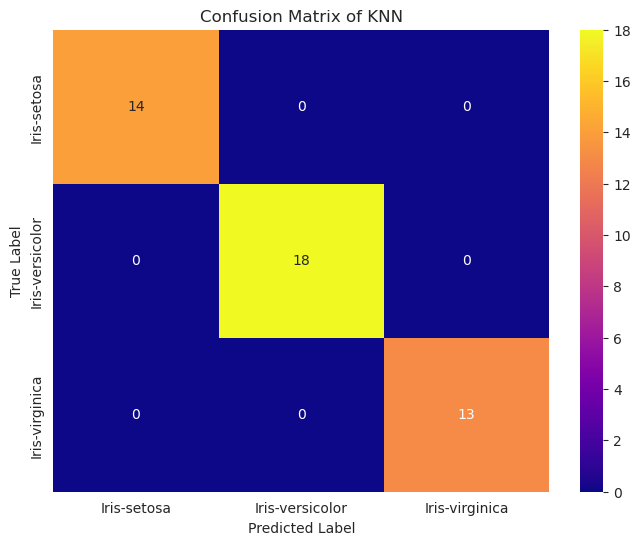

In [26]:
#Confusion Matrix of KNN Model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matr_knn, annot=True, fmt='d', cmap='plasma', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

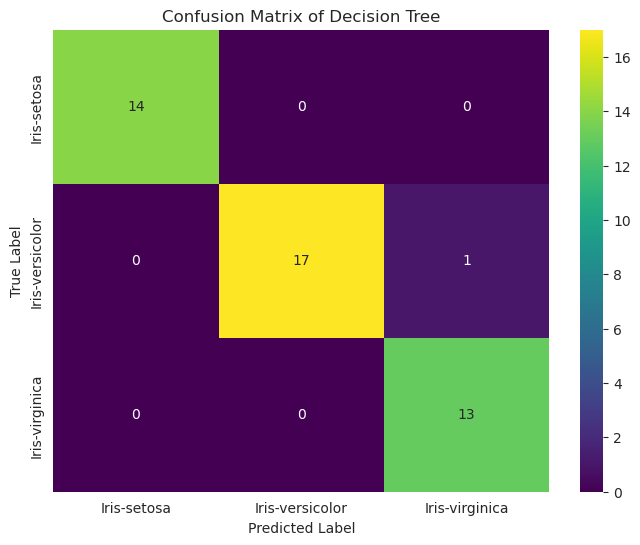

In [27]:
#Confusion Matrix of Decision Tree model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matr_desc_tree, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

# ***Project Report***

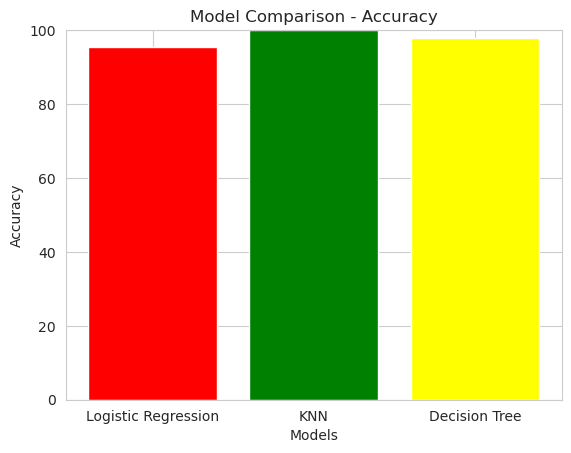

In [28]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [log_reg_accuracy*100, knn_accuracy*100, decision_tree_accuracy*100]
plt.bar(models, accuracies, color=['Red', 'green', 'yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()